<a href="https://colab.research.google.com/github/sfaril12/renewable_energy_clasification_dataset/blob/main/Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import requests

link = 'https://raw.githubusercontent.com/sfaril12/renewable_energy_clasification_dataset/refs/heads/main/Renewable_Energy_Data.csv'

response = requests.get(link)

with open('Renewable_Energy_Data.csv', 'wb') as file:
    file.write(response.content)

In [159]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('Renewable_Energy_Data.csv')
display(df.head())

,Region,Energy_Source,Temperature_C,Wind_Speed_m_s,Solar_Radiation_kWh_m2,Rainfall_mm,Season,Efficiency_Ratio,Lagged_Production_MWh,Combined_Weather_Index,Energy_Class
0,North,Hydro,13.820937,14.362462,8.834648,3.350827,Winter,125.449109,1419.514155,1.565158,Medium
1,North,Solar,36.972782,19.110474,4.483191,48.767157,Winter,16.325089,4769.329958,0.621331,Low
2,East,Hydro,33.972875,0.364652,5.104325,40.848695,Winter,155.637061,1005.077719,0.156378,High
3,South,Solar,-2.965160,3.915560,6.265925,42.627371,Spring,675.516566,6294.250931,-5.180996,High
4,North,Wind,-3.813486,0.151257,9.263826,46.898262,Spring,626.048277,5550.263638,-3.346412,Medium


In [160]:
# Langkah 2 — Data Preparation (versi diperbaiki)
drop_columns = [
    "Region",
    "Temperature_C",
    "Season",
    "Combined_Weather_Index",
    "Energy_Class"
]

# Pastikan hanya menghapus kolom yang benar-benar ada
drop_columns = [col for col in drop_columns if col in df.columns]

# Hapus kolom
df_clean = df.drop(columns=drop_columns)

# Tampilkan hasil
print(" Kolom setelah pembersihan:")
print(df_clean.columns.tolist())
display(df_clean.head())

 Kolom setelah pembersihan:
['Energy_Source', 'Wind_Speed_m_s', 'Solar_Radiation_kWh_m2', 'Rainfall_mm', 'Efficiency_Ratio', 'Lagged_Production_MWh']


,Energy_Source,Wind_Speed_m_s,Solar_Radiation_kWh_m2,Rainfall_mm,Efficiency_Ratio,Lagged_Production_MWh
0,Hydro,14.362462,8.834648,3.350827,125.449109,1419.514155
1,Solar,19.110474,4.483191,48.767157,16.325089,4769.329958
2,Hydro,0.364652,5.104325,40.848695,155.637061,1005.077719
3,Solar,3.915560,6.265925,42.627371,675.516566,6294.250931
4,Wind,0.151257,9.263826,46.898262,626.048277,5550.263638


In [161]:
# Langkah 3 — Membuat kolom Environmental_Condition berbasis persentil 50%

# Hitung batas persentil 50% untuk tiap variabel lingkungan
wind_threshold = df_clean["Wind_Speed_m_s"].quantile(0.4)
solar_threshold = df_clean["Solar_Radiation_kWh_m2"].quantile(0.4)
rain_threshold = df_clean["Rainfall_mm"].quantile(0.4)

print("📊 Batas Persentil 40%:")
print(f"Wind Speed: {wind_threshold:.3f}")
print(f"Solar Radiation: {solar_threshold:.3f}")
print(f"Rainfall: {rain_threshold:.3f}")

# Fungsi untuk menentukan nilai Environmental_Condition
def get_environmental_condition(row):
    if row["Energy_Source"] == "Hydro":
        return 1 if row["Rainfall_mm"] > rain_threshold else 0
    elif row["Energy_Source"] == "Solar":
        return 1 if row["Solar_Radiation_kWh_m2"] > solar_threshold else 0
    elif row["Energy_Source"] == "Wind":
        return 1 if row["Wind_Speed_m_s"] > wind_threshold else 0
    else:
        return 0  # default jika tipe energi lain muncul

# Terapkan fungsi ke dataset
df_clean["Environmental_Condition"] = df_clean.apply(get_environmental_condition, axis=1)

# Tampilkan hasil
print("\n Kolom 'Environmental_Condition' (berbasis persentil 40%) berhasil dibuat:")
display(df_clean[["Energy_Source", "Wind_Speed_m_s", "Solar_Radiation_kWh_m2", "Rainfall_mm", "Environmental_Condition"]].head(10))
display(df_clean.describe())

📊 Batas Persentil 40%:
Wind Speed: 8.221
Solar Radiation: 3.986
Rainfall: 19.352

 Kolom 'Environmental_Condition' (berbasis persentil 40%) berhasil dibuat:


,Energy_Source,Wind_Speed_m_s,Solar_Radiation_kWh_m2,Rainfall_mm,Environmental_Condition
0,Hydro,14.362462,8.834648,3.350827,0
1,Solar,19.110474,4.483191,48.767157,1
2,Hydro,0.364652,5.104325,40.848695,1
3,Solar,3.915560,6.265925,42.627371,1
4,Wind,0.151257,9.263826,46.898262,0
5,Solar,12.949494,0.191161,4.255174,0
6,Wind,17.960611,4.768435,19.279880,1
7,Wind,4.869646,6.877220,3.551744,0
8,Solar,18.540691,7.227070,10.539655,1
9,Solar,1.205348,6.925324,11.468289,1


,Wind_Speed_m_s,Solar_Radiation_kWh_m2,Rainfall_mm,Efficiency_Ratio,Lagged_Production_MWh,Environmental_Condition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.984866,5.011969,24.172916,236.145725,5025.074728,0.587000
std,5.752235,2.895015,14.275435,603.518544,2841.207186,0.492619
min,0.031302,0.000116,0.001536,2.552993,102.247678,0.000000
25%,5.121304,2.509743,11.681940,78.853249,2626.700967,0.000000
50%,10.119946,5.074324,23.854732,150.379798,4874.861948,1.000000
75%,14.926373,7.483630,36.422111,247.428783,7519.971397,1.000000
max,19.966950,9.988926,49.977885,16471.196460,9988.050065,1.000000


In [162]:
# Langkah 4 — Menentukan kolom klasifikasi untuk Efficiency_Ratio dan Lagged_Production_MWh

# Hitung batas persentil 50%
eff_threshold = df_clean["Efficiency_Ratio"].quantile(0.4)
lag_threshold = df_clean["Lagged_Production_MWh"].quantile(0.4)

print(" Batas Persentil 40%:")
print(f"Efficiency_Ratio: {eff_threshold:.3f}")
print(f"Lagged_Production_MWh: {lag_threshold:.3f}")

# Tambahkan kolom klasifikasi
df_clean["Efficiency_Status"] = df_clean["Efficiency_Ratio"].apply(lambda x: 1 if x > eff_threshold else 0)
df_clean["Lagged_Production_Status"] = df_clean["Lagged_Production_MWh"].apply(lambda x: 1 if x > lag_threshold else 0)

# Tampilkan hasil
print("\n Kolom klasifikasi 'Efficiency_Status' dan 'Lagged_Production_Status' berhasil dibuat:")
display(df_clean[["Efficiency_Ratio", "Efficiency_Status", "Lagged_Production_MWh", "Lagged_Production_Status"]].head(10))

 Batas Persentil 40%:
Efficiency_Ratio: 118.743
Lagged_Production_MWh: 3931.862

 Kolom klasifikasi 'Efficiency_Status' dan 'Lagged_Production_Status' berhasil dibuat:


,Efficiency_Ratio,Efficiency_Status,Lagged_Production_MWh,Lagged_Production_Status
0,125.449109,1,1419.514155,0
1,16.325089,0,4769.329958,1
2,155.637061,1,1005.077719,0
3,675.516566,1,6294.250931,1
4,626.048277,1,5550.263638,1
5,201.738058,1,4132.918690,1
6,162.598688,1,5261.632513,1
7,39.163226,0,8976.089119,1
8,11.332449,0,2043.313593,0
9,279.606278,1,323.388666,0


In [163]:
# Langkah 5 — Membuat kolom klasifikasi utama (Final Classification)

# Buat kolom baru 'Classification_Result'
df_clean["Classification_Result"] = df_clean.apply(
    lambda row: 1 if (
        row["Environmental_Condition"] == 1 and
        row["Efficiency_Status"] == 1 and
        row["Lagged_Production_Status"] == 1
    ) else 0,
    axis=1
)

# Tampilkan hasil akhir
print(" Kolom 'Classification_Result' berhasil dibuat:")
display(df_clean[[
    "Energy_Source",
    "Environmental_Condition",
    "Efficiency_Status",
    "Lagged_Production_Status",
    "Classification_Result"
]].head(15))

# Cek distribusi hasil klasifikasi
print("\n Distribusi hasil klasifikasi:")
print(df_clean["Classification_Result"].value_counts(normalize=True).map("{:.2%}".format))

 Kolom 'Classification_Result' berhasil dibuat:


,Energy_Source,Environmental_Condition,Efficiency_Status,Lagged_Production_Status,Classification_Result
0,Hydro,0,1,0,0
1,Solar,1,0,1,0
2,Hydro,1,1,0,0
3,Solar,1,1,1,1
4,Wind,0,1,1,0
5,Solar,0,1,1,0
6,Wind,1,1,1,1
7,Wind,0,0,1,0
8,Solar,1,0,0,0
9,Solar,1,1,0,0



 Distribusi hasil klasifikasi:
Classification_Result
0    80.00%
1    20.00%
Name: proportion, dtype: object


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7040 - loss: 0.6142 - val_accuracy: 0.8000 - val_loss: 0.4822
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7969 - loss: 0.4248 - val_accuracy: 0.8000 - val_loss: 0.2770
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7962 - loss: 0.2860 - val_accuracy: 0.9250 - val_loss: 0.1772
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8900 - loss: 0.2075 - val_accuracy: 1.0000 - val_loss: 0.1300
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9588 - loss: 0.1478 - val_accuracy: 1.0000 - val_loss: 0.0925
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9805 - loss: 0.1051 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0695 - val_accuracy: 1.0000 - val_loss: 0.0239
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9996 - loss: 0.0374 - val_accuracy: 1.0000 

,Pred: Tidak Tepat,Pred: Tepat
Tidak Tepat (0),160,0
Tepat (1),0,40


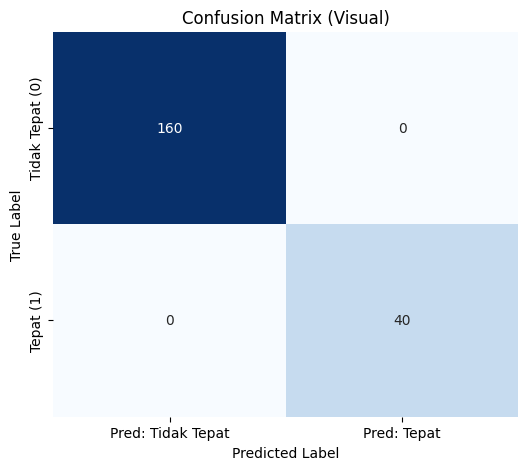

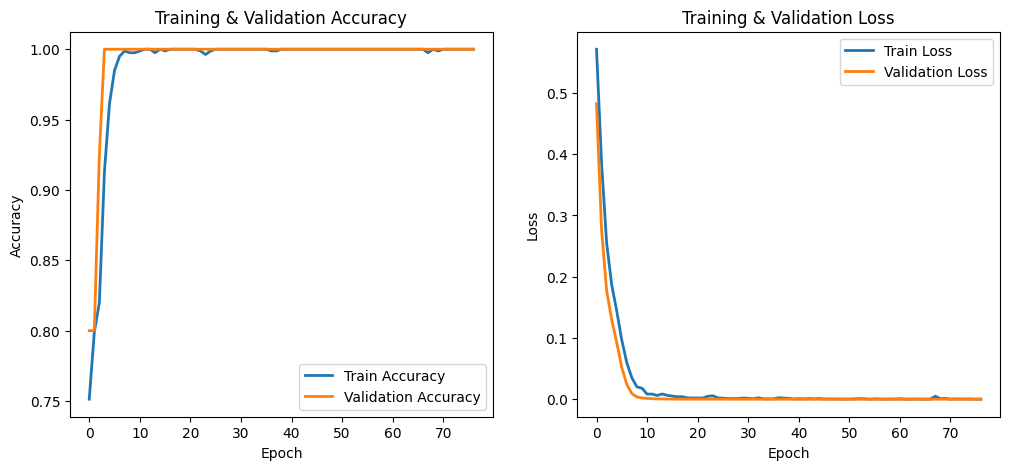


✅ Model, scaler, dan encoder berhasil disimpan untuk deployment!


In [164]:
# ==========================
# MODEL TRAINING NEURAL NETWORK (DETAILED VERSION)
# ==========================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. Pisahkan fitur dan label
X = df_clean[["Energy_Source", "Environmental_Condition", "Efficiency_Status", "Lagged_Production_Status"]].copy()
y = df_clean["Classification_Result"]

# --- 2. Encode kolom kategorikal
encoder = LabelEncoder()
X["Energy_Source"] = encoder.fit_transform(X["Energy_Source"])

# --- 3. Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5. Arsitektur Neural Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# --- 6. Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- 7. EarlyStopping untuk mencegah overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- 8. Training model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# --- 9. Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# --- 10. Evaluasi model
acc = accuracy_score(y_test, y_pred)
print(f"\n Akurasi model: {acc:.4f}\n")
print(" Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# --- 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Tidak Tepat (0)", "Tepat (1)"], columns=["Pred: Tidak Tepat", "Pred: Tepat"])

print("\n Confusion Matrix:")
display(cm_df)

# --- 12. Visualisasi Confusion Matrix (Heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Visual)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# --- 13. Grafik Akurasi dan Loss Selama Training
plt.figure(figsize=(12,5))

# Grafik Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Grafik Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# --- 14. Simpan model dan alat bantu untuk deployment
import joblib

model.save('energy_model.h5')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("\n Model, scaler, dan encoder berhasil disimpan untuk deployment!")


In [165]:
# ==========================
# MODEL DEPLOYMENT INTERAKTIF (VERSI DINAMIS & KONDISI EKSTREM)
# ==========================

import joblib
from tensorflow.keras.models import load_model
import numpy as np

# --- 1️ Muat ulang model dan alat pendukung
loaded_model = load_model('energy_model.h5')
loaded_scaler = joblib.load('scaler.pkl')
loaded_encoder = joblib.load('encoder.pkl')

print(" Model dan alat pendukung berhasil dimuat!\n")

# --- 2️ Batas kondisi lingkungan berdasarkan jenis energi
env_ranges = {
    "Wind": (2.0, 20.0, "wind speed", "m/s"),        # m/s (umum untuk turbin angin)
    "Solar": (0.0, 10.0, "solar radiation", "KWh/m2"),   # kWh/m² (radiasi matahari)
    "Hydro": (0.0, 50.0, "rainfall", "mm")       # mm (curah hujan)
}

# --- 3️ Fungsi interaktif untuk prediksi
def run_energy_prediction():
    print("===  SISTEM PREDIKSI KETEPATAN ENERGI TERBARUKAN ===\n")

    # Input sumber energi
    energy_source = input(" Apa sumber energi yang ingin Anda pakai? (Wind / Solar / Hydro): ").capitalize()
    if energy_source not in env_ranges:
        print("\n Error: Sumber energi tidak dikenali. Gunakan hanya: Wind, Solar, atau Hydro.")
        return

    # Ambil rentang sesuai energi
    env_min, env_max, cn,s = env_ranges[energy_source]

    # Input kondisi lingkungan dinamis
    env_condition = float(input(f" Berapa skor kondisi lingkungannya ({cn} condition, min {env_min} - max {env_max}){s}: "))

    # Periksa apakah nilai di luar batas normal
    extreme_condition = False
    if env_condition < env_min or env_condition > env_max:
        extreme_condition = True
        print(f"\n Peringatan: Kondisi lingkungan {energy_source} berada di luar batas normal!")
        print("  Kondisi ekstrem terdeteksi — hasil prediksi mungkin kurang akurat.\n")

    # Input lainnya
    efficiency_status = float(input(" Berapa rasio efisiensinya?: "))
    lagged_production = float(input(" Berapa produksinya (Lagged Production MWh)?: "))

    # --- Encode sumber energi
    try:
        energy_encoded = loaded_encoder.transform([energy_source])[0]
    except:
        print("\n Error: Gagal mengenali sumber energi.")
        return

    # --- Persiapkan data input
    input_data = np.array([[energy_encoded, env_condition, efficiency_status, lagged_production]])

    # --- Normalisasi
    input_scaled = loaded_scaler.transform(input_data)

    # --- Prediksi
    prediction = loaded_model.predict(input_scaled)[0][0]

    # --- Hasil akhir
    if prediction > 0.5:
        result = " sudah bagus"
        note = "kualitas penggunaan energi keterbarukan sudah tepat untuk digunakan"
    else:
        result = " Tidak bagus"
        note = "kualitas penggunaan energi keterbarukan tidak tepat untuk digunakan"

    # --- Tampilkan hasil
    print("\n=== HASIL PREDIKSI ===")
    print(f" Energi Terbarukan yang Anda Pakai: {energy_source}")
    print(f" Kondisi Lingkungan: {env_condition} (Rentang Normal: {env_min} - {env_max})")
    print(f"  Rasio Efisiensi: {efficiency_status}")
    print(f" Produksi Sebelumnya (MWh): {lagged_production}")
    print(f"\n Hasil Analisis Model: {result}")
    print(f" (Probabilitas Ketepatan = {prediction:.4f})")
    print(note)

    # Jika kondisi ekstrem, beri catatan tambahan
    if extreme_condition:
        print("\n Catatan:")
        print("Kondisi lingkungan saat ini berada di luar batas normal — hasil analisis bisa tidak akurat.")
        print("Disarankan untuk memverifikasi kembali data kondisi lingkungan.")

# --- 4️ Jalankan fungsi interaktif
run_energy_prediction()


✅ Model dan alat pendukung berhasil dimuat!

=== 💡 SISTEM PREDIKSI KETEPATAN ENERGI TERBARUKAN ===

🔹 Apa sumber energi yang ingin Anda pakai? (Wind / Solar / Hydro): solar
🔹 Berapa skor kondisi lingkungannya (Solar condition, min 100.0 - max 1200.0): 12

⚠️ Peringatan: Kondisi lingkungan Solar berada di luar batas normal!
🌪️  Kondisi ekstrem terdeteksi — hasil prediksi mungkin kurang akurat.

🔹 Berapa rasio efisiensinya?: 2.3
🔹 Berapa produksinya (Lagged Production MWh)?: 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

=== HASIL PREDIKSI ===
🌍 Energi Terbarukan yang Anda Pakai: Solar
📊 Kondisi Lingkungan: 12.0 (Rentang Normal: 100.0 - 1200.0)
⚙️  Rasio Efisiensi: 2.3
🔋 Produksi Sebelumnya (MWh): 12.0

➡️ Hasil Analisis Model: ✅ Tepat
   (Probabilitas Ketepatan = 1.0000)

🚨 Catatan:
Kondisi lingkungan saat ini berada di luar batas normal — hasil analisis bisa tidak akurat.
Disarankan untuk memverifikasi kembali data kondisi lingkungan.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
